# Jelfeldolgozás gyakorlat
# 1. feladatsor
## 2018. szeptember 17.

## Task 1
### Mirrorring a vector on an manifold with $\underline{n}$ normal
Let $\underline{v}$ a vector to reflect. Here is how to write the reflection matrix $\matrix{R}$ using the Householder transformation:

$$
\matrix{R} = \matrix{I} - 2 \left( \underline{n} \otimes \underline{n}^{T} \right)
$$

Where $\underline{n}$ is the normal (unit) vector of the subspace.

In [491]:
import numpy as np
import matplotlib.pyplot as plt

##### Please enter the rank of the system!

In [492]:
Rank_f1 = int(input("Choosen rank: "))

Choosen rank: 6


##### Please enter the elements of the $\underline{v}$ vector!

In [416]:
v_f1 = np.empty(Rank_f1)

for i in range(0,Rank_f1):
    v_f1[i] = float(input("v vector's element of index #" + str(i+1) + ": ") or "0")

v vector's element of index #1: 6
v vector's element of index #2: -3
v vector's element of index #3: 7
v vector's element of index #4: -34
v vector's element of index #5: 2
v vector's element of index #6: 6


In [417]:
print("Created v vector: ", v_f1)

Created v vector:  [  6.  -3.   7. -34.   2.   6.]


##### Please enter the elements of the $\underline{n}$ vector!

In [418]:
n_f1 = np.empty(Rank_f1)

for i in range(0,Rank_f1):
    n_f1[i] = float(input("n vector's element of index #" + str(i+1) + ": ") or "0")

n vector's element of index #1: 1
n vector's element of index #2: 7
n vector's element of index #3: -2
n vector's element of index #4: 8
n vector's element of index #5: 5
n vector's element of index #6: -7


In [419]:
# Normalize the vector, creating an N unit vector
n_norm_f1 = n_f1/np.linalg.norm(n_f1)

print("Created (normalized) N vector: ", n_norm_f1)

Created (normalized) N vector:  [ 0.07216878  0.50518149 -0.14433757  0.57735027  0.36084392 -0.50518149]


##### Create Identity matrix

In [420]:
I_f1 = np.eye(Rank_f1)

print("Created Identity matrix: \n", I_f1)

Created Identity matrix: 
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


##### Compose Reflection matrix

In [421]:
Ref_f1 = I_f1 - 2*(np.outer(n_norm_f1,n_norm_f1.T))

print("Created Reflection matrix: \n", Ref_f1)

Created Reflection matrix: 
 [[ 0.98958333 -0.07291667  0.02083333 -0.08333333 -0.05208333  0.07291667]
 [-0.07291667  0.48958333  0.14583333 -0.58333333 -0.36458333  0.51041667]
 [ 0.02083333  0.14583333  0.95833333  0.16666667  0.10416667 -0.14583333]
 [-0.08333333 -0.58333333  0.16666667  0.33333333 -0.41666667  0.58333333]
 [-0.05208333 -0.36458333  0.10416667 -0.41666667  0.73958333  0.36458333]
 [ 0.07291667  0.51041667 -0.14583333  0.58333333  0.36458333  0.48958333]]


##### Reflect $\underline{v}$ vector with the $\matrix{R}$ matrix on manifold with $\underline{n}$ normal component

In [422]:
V_reflected_f1 = Ref_f1@v_f1

print("Reflected vector: ", V_reflected_f1)

Reflected vector:  [  9.46875  21.28125   0.0625   -6.25     19.34375 -18.28125]


#### Conditions

Reflection matrix should be:
- Hermitian: $R = R^{+}$
- Unitary: $R^{-1} = R^{+}$
- Involutory: $R^{2} = I$
- $det(R) = -1$ (Householder matrix)

Test these conditions!

In [423]:
# Hermitian?
if(np.linalg.det(np.around((Ref_f1.conj().T - Ref_f1), 8)) == 0):
    print("R is Hermitian!\nR^+ - R:\n", np.around((Ref_f1.conj().T - Ref_f1), 8))
else:
    print("R is not Hermitian!\nR^+ - R:\n", np.around((Ref_f1.conj().T - Ref_f1), 8))    
print("\n")

# Unitary?
if(np.linalg.det(np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8)) == 0):
    print("R is unitary!\nR^+ - R^-1:\n", np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8))
else:
    print("R is not unitary!\nR^+ - R^-1:\n", np.around((Ref_f1.conj().T - np.linalg.inv(Ref_f1)), 8))
print("\n")

# Involutory?
if(np.linalg.det(np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8)) == 0):
    print("R is involutory!\nR^2 - I:\n", np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8))
else:
    print("R is not involutory!\nR^2 - I:\n", np.around((np.linalg.matrix_power(Ref_f1,2) - I_f1), 8))    
print("\n")

# Calculate determinant: does it equal to -1?
if(np.around(np.linalg.det(Ref_f1), 8) == -1):
    print("The Reflection matrix's determinant does equal to -1!")
else:
    print("The Reflection matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Ref_f1), 8))

R is Hermitian!
R^+ - R:
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


R is unitary!
R^+ - R^-1:
 [[ 0. -0.  0. -0. -0.  0.]
 [-0. -0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0.  0. -0.]
 [-0. -0.  0. -0. -0.  0.]
 [-0. -0.  0.  0. -0.  0.]
 [ 0.  0. -0.  0.  0. -0.]]


R is involutory!
R^2 - I:
 [[ 0.  0. -0.  0.  0. -0.]
 [ 0.  0. -0.  0.  0. -0.]
 [-0. -0.  0. -0. -0.  0.]
 [ 0.  0. -0.  0.  0. -0.]
 [ 0.  0. -0.  0.  0. -0.]
 [-0. -0.  0. -0. -0.  0.]]


The Reflection matrix's determinant does equal to -1!


## Task 2
### Composing an $\Omega$ rotation matrix

Let $\underline{x}$ be an $n$ dimensional vector to rotate. Let $\underline{y}$ be the vector in which we want to rotate the former. Based on these, we define the following base using the Gram-Schmidt process:

$$
\underline{u} = \frac{\underline{x}}{\left\lVert \underline{x} \right\lVert}
$$

és

$$
\underline{v} = \frac{\left( \underline{y} − \left( \underline{u} \cdot \underline{y} \right) \cdot \underline{u} \right)}{\left\lVert \underline{y}− \left( \underline{u} \cdot \underline{y} \right) \cdot \underline{u} \right\lVert}
$$

A general rotation matrix in the n-dimension can be specified as follows:

$$
R = I - \underline{u} \otimes \underline{u}^{T} - \underline{v} \otimes \underline{v}^{T} + \left[ \underline{u},\underline{v} \right] \matrix{R}_{\theta} \left[ \underline{u},\underline{v} \right] ^{T}
$$

Where

$$
\left[ \underline{u},\underline{v} \right]
$$

is a matrix with $ n \times 2 $ elements, where the first column is the $\underline{u}$ vector, and the second is the $\underline{v}$ vector. We multipy this with an $\matrix{R}_{\theta}$ matrix, which we define as follows:

$$
\matrix{R}_{\theta} = 
\begin{pmatrix} 
    \cos(\theta) & -\sin(\theta) \\ 
    \sin(\theta) & \cos(\theta)
\end{pmatrix}
$$

Where

$$
\cos(\theta) = \frac{\underline{x} \cdot \underline{y}}{\left\lVert \underline{x} \right\lVert \left\lVert \underline{y} \right\lVert}
$$

In [424]:
import math

##### Please enter the rank of the system!

In [18]:
Rank_f2 = int(input("Choosen rank: "))

Choosen rank: 3


##### Please enter the elements of the x vector!

In [19]:
x_f2 = np.zeros(Rank_f2)

for i in range(0,Rank_f2):
    x_f2[i] = float(input("X vector's element of index #" + str(i+1) + ": ") or "0")

X vector's element of index #1: 4
X vector's element of index #2: 1
X vector's element of index #3: -6


In [20]:
print("Created X vector: ", x_f2)

Created X vector:  [ 4.  1. -6.]


##### Please enter the elements of the y vector!

In [21]:
y_f2 = np.zeros(Rank_f2)

for i in range(0,Rank_f2):
    y_f2[i] = float(input("Y vector's element of index #" + str(i+1) + ": ") or "0")

Y vector's element of index #1: 3
Y vector's element of index #2: 9
Y vector's element of index #3: 7


In [22]:
print("Created Y vector: ", y_f2)

Created Y vector:  [3. 9. 7.]


##### Creating vector u and v

In [23]:
# Creating u
u_f2 = x_f2 / np.linalg.norm(x_f2)

# Creating v
BaseFor_v_f2 = y_f2 - (u_f2*y_f2)*u_f2
v_f2 = BaseFor_v_f2 / np.linalg.norm(BaseFor_v_f2)

In [24]:
print("Created U vector: ", u_f2)

print("Created V vector: ", v_f2)

Created U vector:  [ 0.54944226  0.13736056 -0.82416338]
Created V vector:  [0.22402265 0.94452792 0.24016842]


##### Creating the identity- and the R matrix

In [40]:
# Creating Indetity
I_f2 = np.eye(Rank_f2)

print("Created Identity matrix: \n", I_f2)

Created Identity matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


##### Defining R_theta matrix

In [117]:
theta = math.acos(
            (np.dot(x_f2,y_f2)) /
            (np.linalg.norm(x_f2)*np.linalg.norm(y_f2))
        )

R_theta = np.matrix([[math.cos(theta),-math.sin(theta)],
           [math.sin(theta), math.cos(theta)]])

print("Angle between the two vectors: ", theta, "rads\n")
print("Created R_theta matrix:\n", R_theta)

Angle between the two vectors:  1.8179717314100685 rads

Created R_theta matrix:
 [[-0.24466619 -0.96960737]
 [ 0.96960737 -0.24466619]]


##### Creating the Rotation matrix

In [408]:
# The [u,v] matrix
u_v = np.column_stack((u_f2,v_f2))

print("[u,v] matrix:\n", u_v, "\n")

# The Rotation matrix
Rot_f2 = I_f2 - np.outer(u_f2,u_f2.T) - np.outer(v_f2,v_f2.T) + np.dot(np.dot(u_v,R_theta),u_v.T)

print("The Rotation matrix:\n", Rot_f2)

[u,v] matrix:
 [[ 0.54944226  0.22402265]
 [ 0.13736056  0.94452792]
 [-0.82416338  0.24016842]] 

The Rotation matrix:
 [[ 0.56178672 -0.83065726  0.1896875 ]
 [ 0.11605123 -0.13389203 -0.92821502]
 [ 0.80362339  0.64533168  0.08277293]]


#### Conditions

(Householder) Rotation matrix should have:

- $det(R) = -1$
- Orthogonal: $R^{-1} = R^{T}$

In [579]:
# Orthogonal?
if(np.linalg.det(np.around((Rot_f2.T - np.linalg.inv(Rot_f2)), 8)) == 0):
    print("R is orthogonal!\nR^T - R^-1:\n", np.around((Rot_f2.T - np.linalg.inv(Rot_f2)), 8))
else:
    print("R is not orthogonal!\nR^T - R^-1:\n", np.around((Rot_f2.T - np.linalg.inv(Rot_f2)), 8))
print("\n")

# Calculate determinant: does it equal to -1?
DetIndicator = -1

if(np.around(np.linalg.det(Rot_f2), 8) == -1):
    print("The Rotation matrix's determinant does equal to -1!")
else:
    print("The Rotation matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Rot_f2), 8))
    DetIndicator = 1

R is not orthogonal!
R^T - R^-1:
 [[-0.0305801  -0.0765607   0.00117867]
 [-0.0694065  -0.02715489  0.09775237]
 [ 0.00581814  0.10964354  0.06143284]]


The Rotation matrix's determinant does not equal to -1!
It's actual value is: 0.99249976


In [580]:
if(DetIndicator == 1):
    # The determinant of Householder matrix is always −1. So, mulitply the last row of M by −1 to get the final desired matrix.
    for k in range(Rank_f2):
        Rot_f2[Rank_f2-1,k] = -1 * Rot_f2[Rank_f2-1,k]

print("Corrected Householder Rotation matrix:\n", Rot_f2)

Corrected Householder Rotation matrix:
 [[ 0.56178672 -0.83065726  0.1896875 ]
 [ 0.11605123 -0.13389203 -0.92821502]
 [-0.80362339 -0.64533168 -0.08277293]]


In [581]:
# Check if the determinant is really -1 now
if(np.around(np.linalg.det(Rot_f2), 8) == -1):
    print("The Rotation matrix's determinant does equal to -1!")
else:
    print("The Rotation matrix's determinant does not equal to -1!\nIt's actual value is:", np.around(np.linalg.det(Rot_f2), 8))
    DetIndicator = 1

The Rotation matrix's determinant does not equal to -1!
It's actual value is: -0.99249976


##### Discussion

The above algorithm orthogonalization (Gram-Schmidt-process) is numerically rather unstable. That is why we have obtained a matrix with a determinant of only approxiamtely -1. The non-existence of orthogonality is also caused by this instability.

## Task 3
### Large numbers

![title](img/largenumbers.jpg)



In [196]:
import decimal
import fractions

##### Testing

In [192]:
Av = 1e+23

print("1e+23 + 23 =", Av + 23)
print("1e+23 + 2018 - 1e+23 =", Av + 2018 - Av)

1e+23 + 23 = 1e+23
1e+23 + 2018 - 1e+23 = 0.0


#####  Discussion

The second equation returns by the (floating-point) value of 0.0. The reason for this is that the floating point number representation is less accurate than the number range in our summation. To eliminate this, we need to use a data type that has a higher accuracy and covers the numberrange, which we uses in our calculations. For example, in python, we can to use the 'decimal' library's Decimal(), or the 'fractions' library's Fraction() function.

##### Solution

##### Smart Addition

In [572]:
# Function: decimal.Decimal(a) + decimal.Decimal(b)
# If we want to preserve accuracy, we need to pass the full values as strings
# Then we need to use the decimal.Decimal() datatype to add numbers with very high accuracy

def SmartAdd(a,b):
    # Need to convert to string
    a = str(a)
    b = str(b)
    
    # Set precision of decimal?
    #decimal.getcontext().prec = 64
    
    return(int(decimal.Decimal(a) + decimal.Decimal(b)))

In [573]:
SmartAdd(Av,23)

100000000000000000000023

##### Smart Substitution

In [576]:
def SmartSub(a,b):
    # Need to convert to string
    a = str(a)
    b = str(b)
    
    # Set precision of decimal?
    decimal.getcontext().prec = 64
    
    return(int(decimal.Decimal(a) - decimal.Decimal(b)))

In [577]:
SmartSub(Av,2018)

99999999999999999997982

## Task 4
### Plotting random datapoints

We need to generate a datatable with $N \approx 1000$ random datapoints. We achieve this, by generating random $\left( x,y \right)$ coordinates in the $\left[ 0,1 \right]$ interval.

In [471]:
import seaborn as sns
import pandas as pd

##### Initial attributes for datapoints

In [517]:
NbOfPoints = int(input("Number of datapoints: ") or "1000")

Number of datapoints: 


In [518]:
# Generate arrays for containing x and y coordinates
# Fill the arrays with random data

x = np.random.rand(NbOfPoints)
y = np.random.rand(NbOfPoints)

DataPointArray = np.column_stack((x,y))

##### Plot datapoints

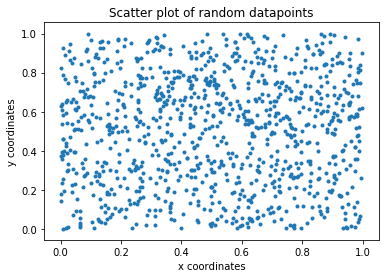

In [519]:
plt.scatter(DataPointArray[:,0], DataPointArray[:,1], marker = '.')
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.title("Scatter plot of random datapoints")
plt.show()

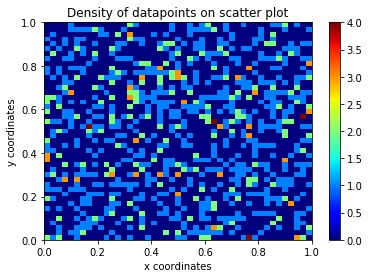

In [520]:
plt.hist2d(DataPointArray[:,0], DataPointArray[:,1], (45, 45), cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel("x coordinates")
plt.ylabel("y coordinates")
plt.title("Density of datapoints on scatter plot")
plt.show()

#### Seaborn library

In [521]:
# Load data to Pandas DataFrame
df = pd.DataFrame({'x': DataPointArray[:,0], 'y': DataPointArray[:,1]})

###### Write to CSV

In [522]:
# Save submission (no index column)
df.to_csv("Task4_scatterplot.csv", index=False, mode='w+')

##### Seaborn scatterplot

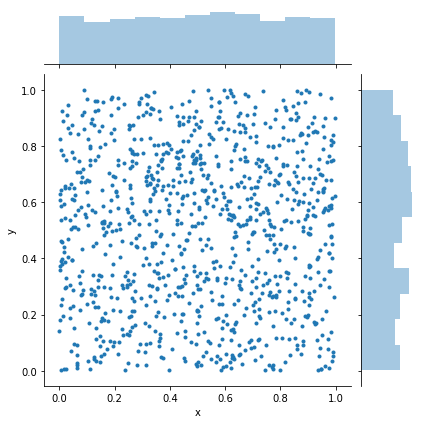

In [523]:
sns.jointplot(x="x", y="y", data=df, marker = '.')

##### Seaborn kernel density estimation

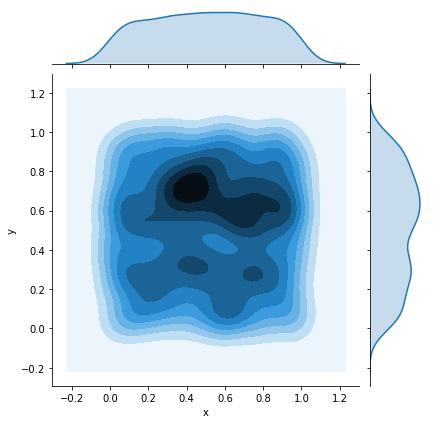

In [566]:
sns.jointplot(x = "x", y = "y", data=df, kind="kde")

##### Seaborn deep contour level

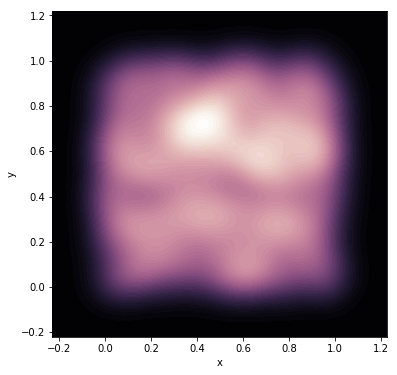

In [526]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

#### Search for the closeset neighbour of every nodes

In [527]:
# Find distance between two choosen node
def DistanceBetweenNodes(node1, node2):
    return(np.linalg.norm(node2 - node1))

# Run through nodes and store distance values in an np.array
ClosesNeighbourDistances = np.empty(NbOfPoints)

def ClosestNeighbour(DataPointArray):
    # Run through points
    for i in range(0,NbOfPoints):
        # Indicating distance to closes neighbour from i-th element
        ActualDistance = 1

        # Measure distance to another point from the first one
        for j in range(i+1,NbOfPoints):
            # Calculate distance between i-th and j-th point
            ActualDistanceTemp = DistanceBetweenNodes(DataPointArray[i], DataPointArray[j])

            # Change value of smallest known distance, if the measured one is smaller, than the actually known one
            if(ActualDistanceTemp < ActualDistance):
                ActualDistance = ActualDistanceTemp

        # At the end of the loop, add smallest known distance to the ClosesNeighbourDistances array
        ClosesNeighbourDistances[i] = ActualDistance

In [528]:
ClosestNeighbour(DataPointArray)

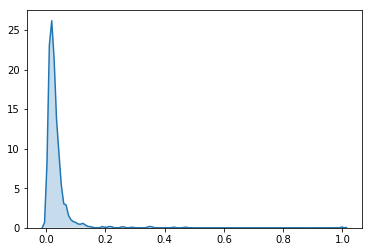

In [529]:
sns.kdeplot(ClosesNeighbourDistances, shade=True)

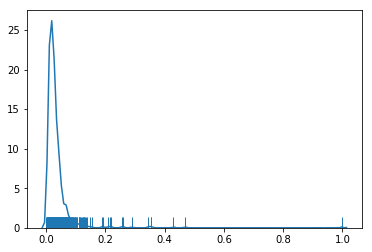

In [531]:
sns.distplot(ClosesNeighbourDistances, hist=False, rug=True);

## Task 5
### Number reprezentation

In [381]:
StartNum = -3*math.sqrt(7)

##### Display a number in scientific notation

In [392]:
def SciNotationFormat(n):
    a = '%E' % n
    return(a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1])

In [395]:
print("Simple notation:", StartNum)
print("Scientific (normal) notation:", SciNotationFormat(StartNum))

Simple notation: -7.937253933193772
Scientific (normal) notation: -7.937254E+00


In [469]:
b_p_1 = np.array((10,2))
b_p_2 = np.array((16,4))

## Task 6
### Calculating the roots of a quadratic equation

## Task 7
### Heron's formula

The algorithm for calculating a triangle's area is the well-known Heron's formula. It states that the area of a triangle whose sides have lengths $a$, $b$, and $c$ is

$$
A = \sqrt{s \left( s-a \right) \left( s-b \right) \left( s-c \right)}
$$

Heron's formula as given above is numerically unstable for triangles with a very small angle when using floating point arithmetic. A stable alternative involves arranging the lengths of the sides so that $a \geq b \geq c$ and computing:

$$
A = \frac{1}{4}\sqrt{ \left( a + \left( b + c \right) \right) \left( c − \left( a − b \right) \right) \left( c + \left( a − b \right) \right) \left( a + \left( b − c \right) \right)}
$$

Where

$$
s = \frac{a+b+c}{2}
$$

The brackets in the above formula are required in order to prevent numerical instability in the evaluation.

##### Set length of sides and $\left( \beta, p \right)$

In [558]:
Side_a = 9
Side_b = 4.53
Side_c = 4.53

b_p_Heron = np.array((10,3))

##### Calculate half-circumference

In [559]:
s_Heron = (Side_a + Side_b + Side_c) / 2

print("Half-circumference", s_Heron)

Half-circumference 9.030000000000001


##### Compare the two implementations of Heron's formula

In [560]:
A_1 = math.sqrt(s_Heron * (s_Heron - Side_a) * (s_Heron - Side_b) * (s_Heron - Side_c))

In [561]:
A_2 = 1/4 * math.sqrt((Side_a + (Side_b + Side_c)) * (Side_c - (Side_a - Side_b)) * (Side_c + (Side_a - Side_b)) * (Side_a + (Side_b - Side_c)))

In [562]:
print("Heron Standard:", A_1)
print("Heron Numerically corrected:", A_2)

Heron Standard: 2.3421624623412036
Heron Numerically corrected: 2.3421624623411685


## Task 8
### Machine epsilon

### Octave

### Python

In [403]:
print("float epsilon:", np.finfo(float).eps)

print("np.float32 epsilon:", np.finfo(np.float32).eps)

print("np.float64 epsilon:", np.finfo(np.float64).eps)

float epsilon: 2.220446049250313e-16
np.float32 epsilon: 1.1920929e-07
np.float64 epsilon: 2.220446049250313e-16


## Task 9
### Random number generator with shift-register and XOR

## Task 10
### Multiplicative congruential random number generator

Multiplicative congruential pseudo-random number generator, generates numbers by a recursive equation, containing 3 parameters and 1 variable, as follows:

$$
x_{i+1} = \left( a*x_{i} + b \right)\ mod\ m
$$



In [737]:
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [747]:
mlab.init_notebook(local=False)

NameError: name 'mlab' is not defined

##### Initial variables

In [636]:
a = 13
b = 0
m = 150
x_0 = 1

##### Generating numbers in the $\left[ 0,1 \right]$ interval

In [672]:
def MultCongRNG(a,b,m,x_0):
    x_p = ((a * x_0 + b) % m) / m
    x_0 = x_p * m

    return(x_0, x_p)

In [678]:
x_0, RndNum = MultCongRNG(a,b,m,x_0)
print("Generated random number:", RndNum)

Generated random number: 0.7105201283006863


### Marsaglia's theorem/Marsaglia effect

The Marsaglia effect encapsulates the regularity, appearing in the numbers as pseudo-random numbers are generated. It was named after its descriptor, Marsaglira.
Marsaglia has shown that n-dimensional vectors, which were created by a pseudo-random generator will be located on a finite number of parallel n-dimensional surfaces, when they're represented.

To show the Marsaglia effect, we create thousands of 3-dimensional vectors, and plot them on a cluster density graph.

In [703]:
DimOfMarsaglia = int(input("Please enter the dimension of examined vectors: ") or "3")

Please enter the dimension of examined vectors: 


In [704]:
NbOfMarsaglia = int(input("Please enter the number of examined vectors: ") or "2000")

Please enter the number of examined vectors: 15000


In [705]:
MarsagliaArray = np.empty((NbOfMarsaglia, 3))

In [706]:
for i in range (NbOfMarsaglia):
    for j in range(DimOfMarsaglia):
        x_0, MarsagliaArray[i,j] = MultCongRNG(a,b,m,x_0)

In [708]:
print("Preview of the created array:\n", MarsagliaArray)

Preview of the created array:
 [[0.25484613 0.31299972 0.06899641]
 [0.89695333 0.66039335 0.5851135 ]
 [0.60647546 0.88418095 0.49435232]
 ...
 [0.11607196 0.50893554 0.61616205]
 [0.01010671 0.13138725 0.70803428]
 [0.2044457  0.65779413 0.5513237 ]]


Text(0.5,0,'Z coordinates')

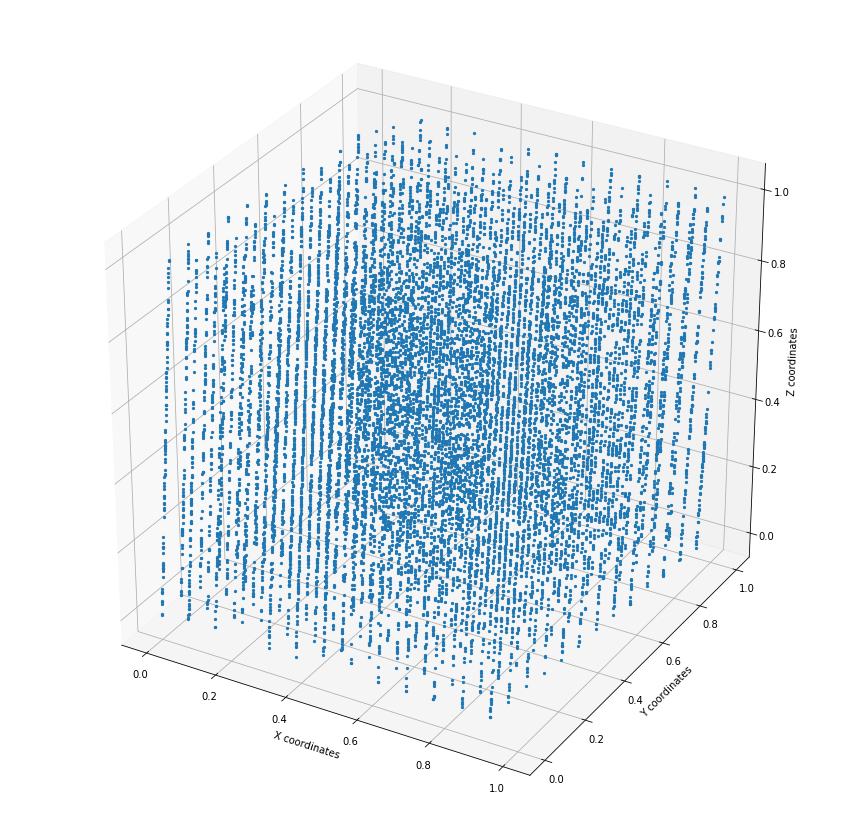

In [748]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=MarsagliaArray.T[0], ys=MarsagliaArray.T[1], zs=MarsagliaArray.T[2], zdir='z', s=20, c=None, depthshade=False, marker='.')
ax.set_xlabel('X coordinates')
ax.set_ylabel('Y coordinates')
ax.set_zlabel('Z coordinates')

In [750]:
x_Mars = MarsagliaArray.T[0]
y_Mars = MarsagliaArray.T[1]
z_Mars = MarsagliaArray.T[2]

xyz_Mars = np.vstack([x_Mars,y_Mars,z_Mars])
kde = stats.gaussian_kde(xyz_Mars)
density = kde(xyz_Mars)

In [751]:
# Plot scatter with mayavi
figure = mlab.figure('DensityPlot')
pts = mlab.points3d(x_Mars, y_Mars, z_Mars, density, scale_mode='none', scale_factor=0.07)
mlab.axes()
mlab.show()

NameError: name 'mlab' is not defined